# Predict which passengers will be transported to an alternate dimension

In [2]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [2]:
df=pd.read_csv("train.csv") #https://www.kaggle.com/competitions/spaceship-titanic

### EDA

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df2=pd.read_csv("test.csv")

In [5]:
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
df.isnull().sum() #We examine the empty lines.

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
df2.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Feature Engineering

In [9]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
df["HomePlanet"]=df["HomePlanet"].map({"Earth":0,"Europa":1,"Mars":2})
#We replace the data in HomePlanet with 0, 1 and 2.
df['HomePlanet'].fillna(0,inplace=True) #We fill empty lines in HomePlanet with 0.
df['HomePlanet']=df['HomePlanet'].astype(int) #We change HomePlanet's data type to integer.
df2["HomePlanet"]=df2["HomePlanet"].map({"Earth":0,"Europa":1,"Mars":2})
df2['HomePlanet'].fillna(0,inplace=True)
df2['HomePlanet']=df2['HomePlanet'].astype(int)

In [11]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [12]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [13]:
df["CryoSleep"]=df["CryoSleep"].map({"False":0,"True":1})
df['CryoSleep'].fillna(0,inplace=True)
df['CryoSleep']=df['CryoSleep'].astype(int)
df["VIP"]=df["VIP"].map({"False":0,"True":1})
df['VIP'].fillna(0,inplace=True)
df['VIP']=df['VIP'].astype(int)
df2["CryoSleep"]=df2["CryoSleep"].map({"False":0,"True":1})
df2['CryoSleep'].fillna(0,inplace=True)
df2['CryoSleep']=df2['CryoSleep'].astype(int)
df2["VIP"]=df2["VIP"].map({"False":0,"True":1})
df2['VIP'].fillna(0,inplace=True)
df2['VIP']=df2['VIP'].astype(int)

In [14]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [15]:
del df["Cabin"]
df["Destination"]=df["Destination"].map({"TRAPPIST-1e":0,"55 Cancri e":1,"PSO J318.5-22":2})
df['Destination'].fillna(0,inplace=True)
df['Destination']=df['Destination'].astype(int)
df2["Destination"]=df2["Destination"].map({"TRAPPIST-1e":0,"55 Cancri e":1,"PSO J318.5-22":2})
df2['Destination'].fillna(0,inplace=True)
df2['Destination']=df2['Destination'].astype(int)

In [16]:
df['Age'].fillna(df['Age'].mean(),inplace=True) #We fill the empty lines in Age with the mean value.
df['Age']=df['Age'].astype(int)
df2['Age'].fillna(df2['Age'].mean(),inplace=True)
df2['Age']=df2['Age'].astype(int)

In [17]:
df['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [18]:
df['RoomService'].fillna(0,inplace=True)
df['RoomService']=df['RoomService'].astype(int)
df2['RoomService'].fillna(0,inplace=True)
df2['RoomService']=df2['RoomService'].astype(int)

In [19]:
df['FoodCourt'].value_counts()

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

In [20]:
df['FoodCourt'].fillna(0,inplace=True)
df['FoodCourt']=df['FoodCourt'].astype(int)
df2['FoodCourt'].fillna(0,inplace=True)
df2['FoodCourt']=df2['FoodCourt'].astype(int)

In [21]:
df['ShoppingMall'].value_counts()

0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

In [22]:
df['ShoppingMall'].fillna(0,inplace=True)
df['ShoppingMall']=df['ShoppingMall'].astype(int)
df2['ShoppingMall'].fillna(0,inplace=True)
df2['ShoppingMall']=df2['ShoppingMall'].astype(int)

In [23]:
df['Spa'].value_counts()

0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64

In [24]:
df['Spa'].fillna(0,inplace=True)
df['Spa']=df['Spa'].astype(int)
df2['Spa'].fillna(0,inplace=True)
df2['Spa']=df2['Spa'].astype(int)

In [25]:
df['VRDeck'].value_counts()

0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64

In [26]:
df['VRDeck'].fillna(0,inplace=True)
df['VRDeck']=df['VRDeck'].astype(int)
df2['VRDeck'].fillna(0,inplace=True)
df2['VRDeck']=df2['VRDeck'].astype(int)

In [27]:
abs(df.corr()["Transported"].sort_values(ascending=False)) #We look at their correlations.

Transported     1.000000
HomePlanet      0.115461
Destination     0.067972
FoodCourt       0.045583
ShoppingMall    0.009391
Age             0.074245
VRDeck          0.204874
Spa             0.218545
RoomService     0.241124
CryoSleep            NaN
VIP                  NaN
Name: Transported, dtype: float64

### Data Visualization 

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


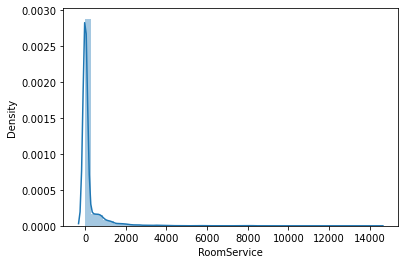

In [28]:
sns.distplot(df['RoomService']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


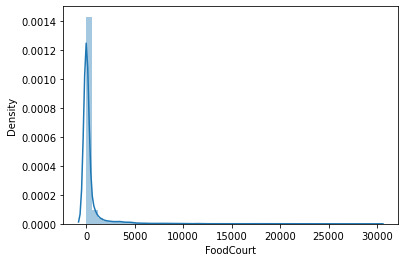

In [29]:
sns.distplot(df['FoodCourt']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


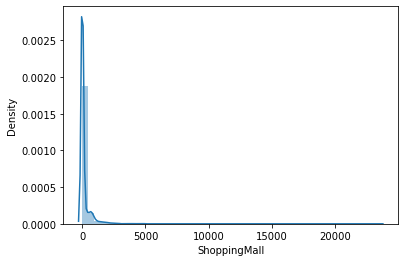

In [30]:
sns.distplot(df['ShoppingMall']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


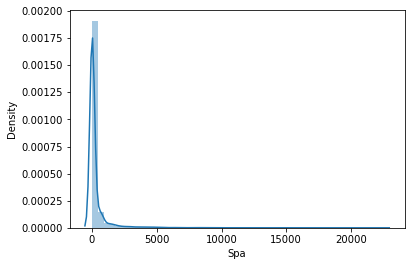

In [31]:
sns.distplot(df['Spa']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


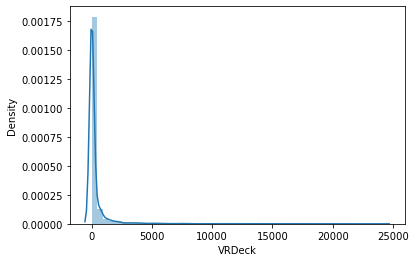

In [32]:
sns.distplot(df['VRDeck']);

C:\Users\mehme\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


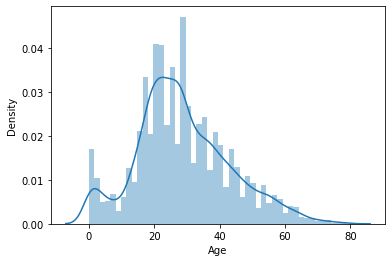

In [33]:
sns.distplot(df['Age']);

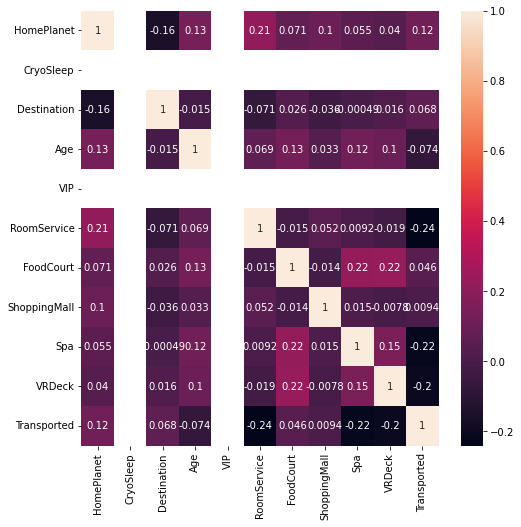

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [35]:
df=df[df['VRDeck']<2500] #We delete values greater than 2499 in VRDeck.

In [36]:
df=df[df['Spa']<2000]

In [37]:
df=df[df['ShoppingMall']<1000]

In [38]:
df=df[df['RoomService']<2500]

In [39]:
abs(df.corr()["Transported"].sort_values(ascending=False))

Transported     1.000000
HomePlanet      0.172104
FoodCourt       0.101697
Destination     0.074742
Age             0.046354
ShoppingMall    0.113281
VRDeck          0.227951
Spa             0.253530
RoomService     0.301452
CryoSleep            NaN
VIP                  NaN
Name: Transported, dtype: float64

### Classification

In [40]:
x,y=df.drop(["Transported","PassengerId","Name","Destination","Age"],axis=1),df[["Transported"]]
df_test=df2.drop(["PassengerId","Name","Cabin","Destination","Age"],axis=1)
x=scaler.fit_transform(x)
df_test=scaler.fit_transform(df_test)

In [47]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7
0,0.5,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.043652,0.000302,0.025151,0.276018,0.017756
2,0.0,0.0,0.0,0.121346,0.002348,0.151911,0.284062,0.000807
3,0.0,0.0,0.0,0.000000,0.016201,0.000000,0.146305,0.000000
4,0.0,0.0,0.0,0.016820,0.051622,0.003018,0.000000,0.000000


In [48]:
pd.DataFrame(df_test).head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000356,0.00000,0.142260,0.000000
2,0.5,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.5,0.0,0.0,0.000000,0.263206,0.00000,0.009121,0.026266
4,0.0,0.0,0.0,0.000865,0.000000,0.07658,0.000000,0.000000


In [49]:
x.shape

(7676, 8)

In [50]:
model=Sequential()
model.add(Dense(10,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(160,activation="relu"))
model.add(Dense(320,activation="relu"))
model.add(Dense(640,activation="relu"))
model.add(Dense(320,activation="relu"))
model.add(Dense(160,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [51]:
model.fit(x,y,batch_size=128,epochs=1000,verbose=1)
model.summary()

Epoch 1/1000
60/60 [==============================] - 2s 5ms/step - loss: 0.6238 - accuracy: 0.6697
Epoch 2/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.5778 - accuracy: 0.7428
Epoch 3/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.5633 - accuracy: 0.7508
Epoch 4/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.5518 - accuracy: 0.7596
Epoch 5/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.5503 - accuracy: 0.7591
Epoch 6/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.5416 - accuracy: 0.7599
Epoch 7/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.5384 - accuracy: 0.7592
Epoch 8/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.5346 - accuracy: 0.7619
Epoch 9/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4943 - accuracy: 0.7688
Epoch 10/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4835 - accuracy: 0.7729

60/60 [==============================] - 0s 5ms/step - loss: 0.4433 - accuracy: 0.7925
Epoch 163/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.7927
Epoch 164/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.7918
Epoch 165/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4449 - accuracy: 0.7914
Epoch 166/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4488 - accuracy: 0.7860
Epoch 167/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4451 - accuracy: 0.7895
Epoch 168/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4451 - accuracy: 0.7888
Epoch 169/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4428 - accuracy: 0.7913
Epoch 170/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.7939
Epoch 171/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4397 - accuracy: 0.

60/60 [==============================] - 0s 5ms/step - loss: 0.4249 - accuracy: 0.8005
Epoch 323/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4235 - accuracy: 0.7972
Epoch 324/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4163 - accuracy: 0.8047
Epoch 325/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4196 - accuracy: 0.8042
Epoch 326/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4164 - accuracy: 0.8039
Epoch 327/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4138 - accuracy: 0.8065
Epoch 328/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4273 - accuracy: 0.7970
Epoch 329/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4227 - accuracy: 0.8021
Epoch 330/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4169 - accuracy: 0.8028
Epoch 331/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4141 - accuracy: 0.

60/60 [==============================] - 0s 5ms/step - loss: 0.4016 - accuracy: 0.8101
Epoch 483/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4015 - accuracy: 0.8099
Epoch 484/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3982 - accuracy: 0.8116
Epoch 485/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3921 - accuracy: 0.8133
Epoch 486/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3972 - accuracy: 0.8119
Epoch 487/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3913 - accuracy: 0.8145
Epoch 488/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3899 - accuracy: 0.8138
Epoch 489/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3944 - accuracy: 0.8136
Epoch 490/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.4014 - accuracy: 0.8101
Epoch 491/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3926 - accuracy: 0.

60/60 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.8296
Epoch 643/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3685 - accuracy: 0.8266
Epoch 644/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3777 - accuracy: 0.8215
Epoch 645/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3724 - accuracy: 0.8245
Epoch 646/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3657 - accuracy: 0.8295
Epoch 647/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3580 - accuracy: 0.8296
Epoch 648/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3615 - accuracy: 0.8295
Epoch 649/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3642 - accuracy: 0.8303
Epoch 650/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3780 - accuracy: 0.8220
Epoch 651/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.

60/60 [==============================] - 0s 5ms/step - loss: 0.3499 - accuracy: 0.8357
Epoch 803/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3556 - accuracy: 0.8348
Epoch 804/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3470 - accuracy: 0.8383
Epoch 805/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3552 - accuracy: 0.8326
Epoch 806/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3565 - accuracy: 0.8326
Epoch 807/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3486 - accuracy: 0.8365
Epoch 808/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3548 - accuracy: 0.8370
Epoch 809/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3460 - accuracy: 0.8392
Epoch 810/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3443 - accuracy: 0.8391
Epoch 811/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3398 - accuracy: 0.

60/60 [==============================] - 0s 5ms/step - loss: 0.3258 - accuracy: 0.8498
Epoch 963/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3304 - accuracy: 0.8441
Epoch 964/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.8435
Epoch 965/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3263 - accuracy: 0.8477
Epoch 966/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3481 - accuracy: 0.8399
Epoch 967/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3505 - accuracy: 0.8388
Epoch 968/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3313 - accuracy: 0.8447
Epoch 969/1000
60/60 [==============================] - 0s 5ms/step - loss: 0.3356 - accuracy: 0.8429
Epoch 970/1000
60/60 [==============================] - 0s 6ms/step - loss: 0.3350 - accuracy: 0.8430
Epoch 971/1000
60/60 [==============================] - 0s 6ms/step - loss: 0.3330 - accuracy: 0.

In [52]:
scores=model.evaluate(x,y)

240/240 [==============================] - 1s 1ms/step - loss: 0.3157 - accuracy: 0.8530


In [53]:
tahmin=model.predict(df_test)

134/134 [==============================] - 0s 1ms/step


In [54]:
sonuc=df2[["PassengerId"]]
sonuc["Transported"]=tahmin
for i in range(4277):
    if sonuc["Transported"][i]>=0.7:
        sonuc["Transported"][i]=1
    else:
        sonuc["Transported"][i]=0
sonuc["Transported"]=sonuc["Transported"].astype("bool")
sonuc.to_csv("Deeplearning tahmini.csv",index=False)

C:\Users\mehme\AppData\Local\Temp\ipykernel_3044\1025295799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Transported"]=tahmin
C:\Users\mehme\AppData\Local\Temp\ipykernel_3044\1025295799.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Transported"][i]=0
C:\Users\mehme\AppData\Local\Temp\ipykernel_3044\1025295799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [55]:
sonuc['Transported'].value_counts()

False    2251
True     2026
Name: Transported, dtype: int64

In [56]:
tahmin

array([[0.63291794],
       [0.6151491 ],
       [0.9642785 ],
       ...,
       [0.87282425],
       [1.        ],
       [0.63291794]], dtype=float32)

In [57]:
sonuc

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [41]:
def classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [46]:
classification_funct(x,y)

(6140, 8) (1536, 8) (6140, 1) (1536, 1)


C:\Users\mehme\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mehme\AppData\Local\Temp\ipykernel_13160\4131164786.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.822398,0.882282,0.770127,0.795573
KNeighborsClassifier,0.807412,0.872573,0.751306,0.776693
XGBClassifier,0.807236,0.866505,0.755556,0.777995
LogisticRegression,0.806939,0.875000,0.748702,0.775391
GaussianNB,0.799122,0.883495,0.729459,0.761719
DecisionTreeClassifier,0.782086,0.868932,0.711023,0.740234
BernoulliNB,0.748481,0.747573,0.749392,0.730469


In [47]:
g=GaussianNB()
b=BernoulliNB()
KN=KNeighborsClassifier()
D=DecisionTreeClassifier()
R=RandomForestClassifier()
Log=LogisticRegression()
XGBC=XGBClassifier()
    
algos=[g,b,KN,D,R,Log,XGBC]
algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
for i in range(7):
    algos[i].fit(x,y)
    tahmin=algos[i].predict(df_test)
    sonuc=df2[["PassengerId"]]
    sonuc["Transported"]=tahmin
    sonuc["Transported"]=sonuc["Transported"].astype("bool")
    sonuc.to_csv("{} tahmini.csv".format(algo_names[i]),index=False)

C:\Users\mehme\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mehme\AppData\Local\Temp\ipykernel_13160\2144390211.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Transported"]=tahmin
C:\Users\mehme\AppData\Local\Temp\ipykernel_13160\2144390211.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

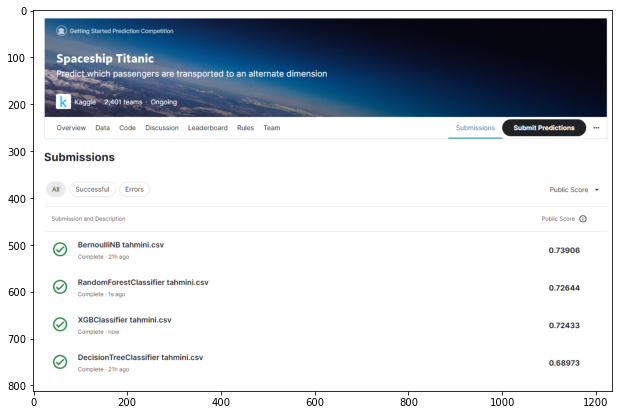

In [4]:
from PIL import Image
a=np.array(Image.open("Opera Anlık Görüntü_2023-01-30_141307_www.kaggle.com.png"))
plt.figure(figsize=(15,7))
plt.imshow(a);